In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [30]:
class PolyReg:
    def __init__(self,x,y):
        self.x = x 
        self.y = y

    def _build_A(self,deg):
        A = np.zeros((deg+1,deg+1))
        B = np.zeros(deg+1)
        for row in range(deg+1):
            B[row] = sum(self.y*self.x**row)
            for col in range(deg+1):
                if (row==0) & (col==0):
                    A[row,col] = len(self.x)
                else:
                    A[row,col] = sum(self.x**[row+col])
        return A, B

    def _compute_error(self,C):
        y = np.zeros_like(self.x)
        for idx,c in enumerate(C):
            y += c*self.x**idx
        self.mse = np.mean(np.sqrt((y-self.y)**2))
        sse = sum((self.y-y)**2)
        sst = sum((self.y-np.mean(self.y))**2)
        self.R2 = 1-sse/sst
        return None

    def __call__(self,deg):
        A, B = self._build_A(deg)
        n = 1001
        x = np.linspace(self.x[0],self.x[-1],n)
        C = np.linalg.solve(A,B)
        sol = np.zeros(n)
        for idx,c in enumerate(C):
            sol += c*x**idx
        self._compute_error(C)
        return sol



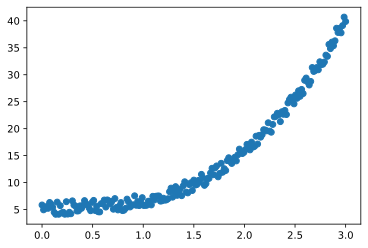

In [45]:
x = np.linspace(0,3,201)
y = 1.3*x**3 + 4.1 + np.random.rand(201)*2.5
plt.scatter(x,y)
plt.show()

In [46]:
reg = PolyReg(x,y)

Text(37.03242427399215, 0.30000000000000004, 'R-squared: \n0.9913')

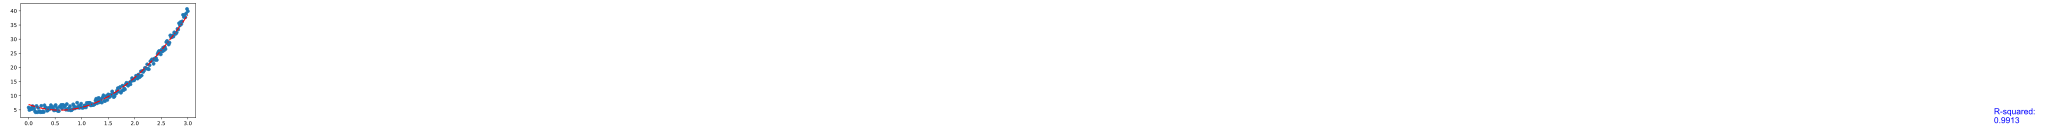

In [50]:
yreg = reg(2)
texttop = y.max() - (y.max()-y.min())*0.1
textleft = x.min() + (x.max()-x.min())*0.1
xreg = np.linspace(x[0],x[-1],len(yreg))
font = {'fontname':'Arial',
        'color':'blue',
        'weight':'ultralight',
        'size':16}
plt.scatter(x,y)
plt.plot(xreg,yreg,'r-.',lw=2)
plt.text(texttop,textleft,f'R-squared: \n{reg.R2:.4f}',fontdict=font)